In [1]:
!pip install --upgrade pandas_datareader


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 173.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.8 kB/s eta 0:00:0000:0100:04m


In [22]:
!pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 51.4 kB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.1 kB/s eta 0:00:0000:0100:02
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 48.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 67.5 kB/s eta 0:00:00a 0:00:01m
  Created wheel for frozendict: filename=frozendict-2.4.0-py3-none-any.whl size=15425 sha256=96e108aa13287c296ffd82bfcf17019223afa67f8bfc3904efc92847cc069dee
  Stored in directory: /Users/anmolchalise/Library/Caches/pip/wheels/31/dd/81/a814e6f8cde8a1bbc1f088fdc273943371f10478b91a605e14
  Created wheel for peewee: filename=peew

In [145]:

import pandas as pd
import numpy as np
import datetime as dt
from pandas_datareader import data as pdr
from scipy.stats import norm, t
import matplotlib.pyplot as plt
import yfinance as yf

## Data Visualization

In [173]:

# Import data
def getData(stocks, start, end):
    stockData = yf.download(stocks, start=start, end=end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return returns, meanReturns, covMatrix


In [174]:
stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
stocks = [stock+'.AX' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=800)

In [175]:

returns, meanReturns, covMatrix = getData(stocks, start=startDate, end=endDate)
returns = returns.dropna()



[*********************100%%**********************]  6 of 6 completed


In [176]:
stockData


Ticker,BHP.AX,CBA.AX,NAB.AX,STO.AX,TLS.AX,WBC.AX
Date,,,,,,
2021-12-13,36.542332,98.029999,28.490000,6.60,4.05,20.820000
2021-12-14,36.756031,97.540001,28.459999,6.53,4.11,20.930000
2021-12-15,36.569046,96.930000,28.590000,6.48,4.10,20.990000
2021-12-16,36.203979,96.790001,28.750000,6.38,4.10,20.959999
2021-12-17,36.862881,99.120003,28.830000,6.42,4.09,21.030001
...,...,...,...,...,...,...
2024-02-12,46.070000,115.730003,32.650002,7.34,3.98,24.500000
2024-02-13,46.320000,116.000000,32.930000,7.38,3.97,24.549999
2024-02-14,45.950001,114.070000,32.509998,7.39,3.99,24.120001


In [204]:
returns

Ticker,BHP.AX,CBA.AX,NAB.AX,STO.AX,TLS.AX,WBC.AX,portfolio
Date,,,,,,,
2021-12-14,0.005848,-0.004998,-0.001053,-0.010606,0.014815,0.005283,0.002825
2021-12-15,-0.005087,-0.006254,0.004568,-0.007657,-0.002433,0.002867,-0.001900
2021-12-16,-0.009983,-0.001444,0.005596,-0.015432,0.000000,-0.001429,-0.003058
2021-12-17,0.018200,0.024073,0.002783,0.006270,-0.002439,0.003340,0.007960
2021-12-20,-0.007246,0.000807,-0.010406,-0.048287,0.004890,-0.000951,-0.008220
...,...,...,...,...,...,...,...
2024-02-13,0.005427,0.002333,0.008576,0.005450,-0.002513,0.002041,0.003434
2024-02-14,-0.007988,-0.016638,-0.012754,0.001355,0.005038,-0.017515,-0.007726
2024-02-15,-0.016975,0.000789,0.010458,-0.008119,-0.022556,0.010365,-0.005085


In [177]:
covMatrix

Ticker,BHP.AX,CBA.AX,NAB.AX,STO.AX,TLS.AX,WBC.AX
Ticker,,,,,,
BHP.AX,0.000305,0.000044,0.000041,0.000141,0.000015,0.000044
CBA.AX,0.000044,0.000134,0.000107,0.000038,0.000036,0.000103
NAB.AX,0.000041,0.000107,0.000148,0.000037,0.000034,0.000115
STO.AX,0.000141,0.000038,0.000037,0.000304,0.000015,0.000039
TLS.AX,0.000015,0.000036,0.000034,0.000015,0.000087,0.000030
WBC.AX,0.000044,0.000103,0.000115,0.000039,0.000030,0.000150


In [207]:
meanReturns

Ticker
BHP.AX    0.000574
CBA.AX    0.000391
NAB.AX    0.000352
STO.AX    0.000343
TLS.AX   -0.000025
WBC.AX    0.000426
dtype: float64

In [178]:
weights = np.random.random(len(returns.columns))
weights /= np.sum(weights)

In [179]:
returns['portfolio']=returns.dot(weights) ##gives weighted mean 


In [180]:
returns 

Ticker,BHP.AX,CBA.AX,NAB.AX,STO.AX,TLS.AX,WBC.AX,portfolio
Date,,,,,,,
2021-12-14,0.005848,-0.004998,-0.001053,-0.010606,0.014815,0.005283,0.002825
2021-12-15,-0.005087,-0.006254,0.004568,-0.007657,-0.002433,0.002867,-0.001900
2021-12-16,-0.009983,-0.001444,0.005596,-0.015432,0.000000,-0.001429,-0.003058
2021-12-17,0.018200,0.024073,0.002783,0.006270,-0.002439,0.003340,0.007960
2021-12-20,-0.007246,0.000807,-0.010406,-0.048287,0.004890,-0.000951,-0.008220
...,...,...,...,...,...,...,...
2024-02-13,0.005427,0.002333,0.008576,0.005450,-0.002513,0.002041,0.003434
2024-02-14,-0.007988,-0.016638,-0.012754,0.001355,0.005038,-0.017515,-0.007726
2024-02-15,-0.016975,0.000789,0.010458,-0.008119,-0.022556,0.010365,-0.005085


## Monte Carlo Simulation

In [205]:
mc_sims = 400   # number of simulations
T = 100   #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

In [172]:
portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)
initialPortfolio = 10000

In [160]:
def cholesky_decomposition(A):
    size = len(A)
    L = [[0.0] * size for _ in range(size)]
    for i in range(size):
        for k in range(i+1):
            s = sum(L[i][j] * L[k][j] for j in range(k))
            
            if (i == k): 
                L[i][k] = (A[i][i] - s)**0.5
            else:
                L[i][k] = (1.0 / L[k][k] * (A[i][k] - s))
    return L

In [192]:
for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))   #crates 100*6 matrix full of random elements
    L = cholesky_decomposition(covMatrix.to_numpy())  #creates 6*6)
    dailyReturns = meanM + np.inner(L, Z)        #result is 6*100
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio

In [ ]:
portfolio_sims

In [183]:
dailyReturns.shape

(6, 100)

In [ ]:
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

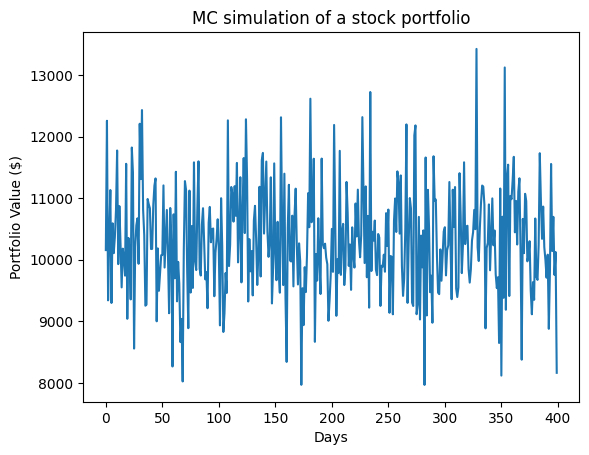

In [201]:
plt.plot(portfolio_sims[-1,:])
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

## Predictions/ Risk Analysis

In [163]:
def mcVaR(returns, alpha=5):

    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError("Expected a pandas data series.")

def mcCVaR(returns, alpha=5):

    if isinstance(returns, pd.Series):
        belowVaR = returns <= mcVaR(returns, alpha=alpha)
        return returns[belowVaR].mean()
    else:
        raise TypeError("Expected a pandas data series.")
     


In [202]:
portfolio_sims.shape

(100, 400)

In [164]:
portResults = pd.Series(portfolio_sims[-1,:])

VaR = initialPortfolio - mcVaR(portResults, alpha=5)
CVaR = initialPortfolio - mcCVaR(portResults, alpha=5)

print('VaR ${}'.format(round(VaR,2)))
print('CVaR ${}'.format(round(CVaR,2)))

VaR $997.22
CVaR $1313.63
